# Proximity network graph

Mappings based on the concept of proximity use measures of distance or similarity to calculate the distance between the points of the time series incorporated in the multidimensional phase space. These methods map states of the time series into nodes of the network and create edges between those nodes based on some measure of distance or similarity.

(Silva, Vanessa Freitas, et al. "Time series analysis via network science: Concepts and algorithms." Wiley Interdisciplinary Reviews: Data Mining and Knowledge Discovery 11.3 (2021): e1404.)

In [1]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

from core.model import Timeseries, TimeseriesPreprocessing, TimeseriesPreprocessingSegmentation, TimeseriesPreprocessingComposite, TimeseriesView, TimeGraph
from tsg_io.input import CsvFile
from to_graph.strategy_to_graph import BuildTimeseriesToGraphProximityNetwork
from to_graph.strategy_linking_multi_graphs import LinkGraphs
import warnings
warnings.filterwarnings('ignore')

amazon_path = os.path.join(os.getcwd(), "amazon", "AMZN.csv")

## Cycle networks

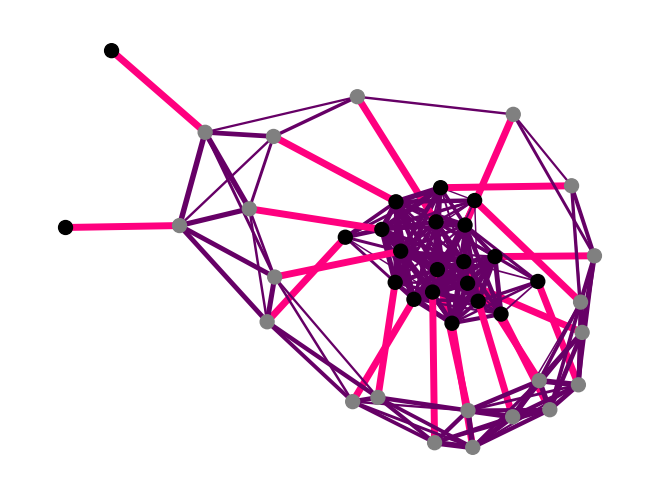

In [2]:
timegraph_cycle_network = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(60, 90))\
    .add(Timeseries(CsvFile(amazon_path, "Close").from_csv())\
         .with_preprocessing(TimeseriesPreprocessingSegmentation(120, 150)))\
    .to_graph(BuildTimeseriesToGraphProximityNetwork(method="cycle").get_strategy())\
    .link(LinkGraphs().time_cooccurrence())\
    .draw()

## Correlation networks

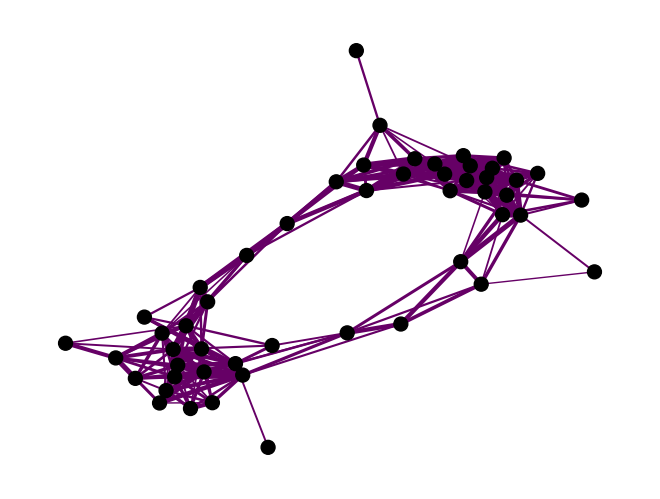

In [3]:
timegraph_correlation_network = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(90, 150))\
    .to_graph(BuildTimeseriesToGraphProximityNetwork(method="correlation").get_strategy())\
    .draw()

## Recurrence networks

Checking edge (0, 1): distance = 0.25, epsilon = 0.5
Checking edge (0, 3): distance = 0.45833299999999966, epsilon = 0.5
Checking edge (0, 5): distance = 0.28645799999999966, epsilon = 0.5
Checking edge (0, 9): distance = 0.5, epsilon = 0.5
Checking edge (0, 20): distance = 0.19791700000000034, epsilon = 0.5
Checking edge (0, 21): distance = 0.10416700000000034, epsilon = 0.5
Checking edge (0, 22): distance = 0.125, epsilon = 0.5
Checking edge (0, 23): distance = 0.40104200000000034, epsilon = 0.5
Checking edge (0, 24): distance = 0.35416700000000034, epsilon = 0.5
Checking edge (0, 25): distance = 0.32291700000000034, epsilon = 0.5
Checking edge (0, 27): distance = 0.5, epsilon = 0.5
Checking edge (0, 28): distance = 0.45833299999999966, epsilon = 0.5
Checking edge (0, 29): distance = 0.44791700000000034, epsilon = 0.5
Checking edge (1, 2): distance = 0.296875, epsilon = 0.5
Checking edge (1, 3): distance = 0.20833299999999966, epsilon = 0.5
Checking edge (1, 4): distance = 0.33333299

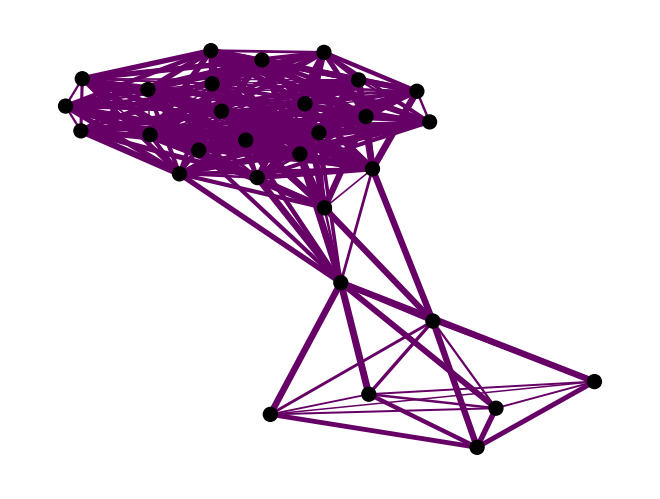

In [4]:
timegraph_recurrence_network = Timeseries(CsvFile(amazon_path, "Close").from_csv())\
    .with_preprocessing(TimeseriesPreprocessingSegmentation(90, 120))\
    .to_graph(BuildTimeseriesToGraphProximityNetwork(method="recurrence").get_strategy())\
    .draw()